## Iris Data Set
This problem sheet relates to the [Iris data set](https://archive.ics.uci.edu/ml/datasets/iris) and uses jupyter, numpy and pyplot. Problems are labelled 1 to 10. 

### 1. Get and load the Iris data.

In [1]:
import numpy as np
# Adapted from https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html

filename = 'data.csv'
sLen, sWid, pLen, pWid = np.genfromtxt('data.csv', delimiter=',', usecols=(0,1,2,3), unpack=True, dtype=float)
spec = np.genfromtxt('data.csv', delimiter=',', usecols=(4), unpack=True, dtype=str)

        
for i in range(10):
    print('{0:.1f} {1:.1f} {2:.1f} {3:.1f} {4:s}'.format(sLen[i], sWid[i], pLen[i], pWid[i], spec[i]))

5.1 3.5 1.4 0.2 Iris-setosa
4.9 3.0 1.4 0.2 Iris-setosa
4.7 3.2 1.3 0.2 Iris-setosa
4.6 3.1 1.5 0.2 Iris-setosa
5.0 3.6 1.4 0.2 Iris-setosa
5.4 3.9 1.7 0.4 Iris-setosa
4.6 3.4 1.4 0.3 Iris-setosa
5.0 3.4 1.5 0.2 Iris-setosa
4.4 2.9 1.4 0.2 Iris-setosa
4.9 3.1 1.5 0.1 Iris-setosa


### 2. Write a note about the data set.  
The [Iris data set](https://archive.ics.uci.edu/ml/datasets/iris) was created by Ronald Fisher in 1936 and contains 50 samples from each of the three species of Iris - Iris setosa, Iris virginica and Iris versicolor. The structure of the set is as follows: *sepal length, sepal width, petal length, petal width, species classification*. A raw copy of the data set can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data).  

### 3. Create a simple plot.
Use pyplot to create a scatter plot of sepal length on the x-axis versus sepal width on the y-axis.

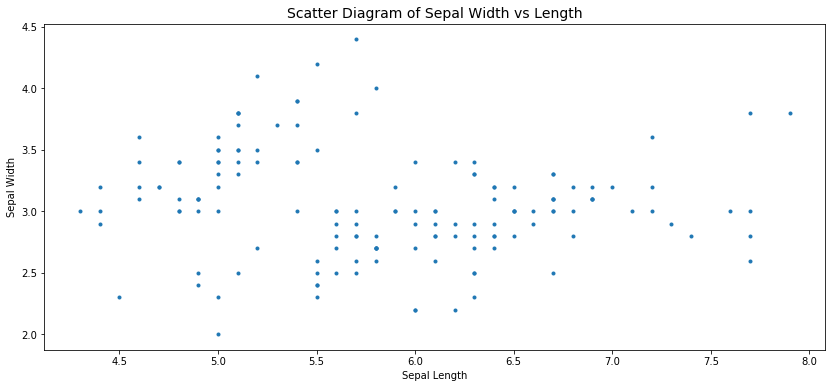

In [2]:
import matplotlib.pyplot as pl

pl.rcParams['figure.figsize'] = (14, 6) # Adapted from gradient descent notebook: https://github.com/emerging-technologies/emerging-technologies.github.io/blob/master/notebooks/gradient-descent.ipynb
pl.scatter(sLen, sWid, marker='.')

pl.title('Scatter Diagram of Sepal Width vs Length', fontsize=14)
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.show()

### 4. Create a more complex plot.
Recreate the above plot, marking the data points in different colours depending on species. Add a legend to the plot to show what species relates to what colour.

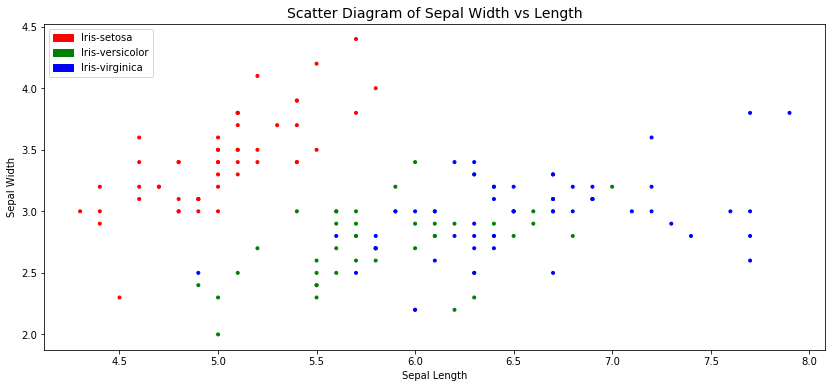

In [3]:
import matplotlib.patches as mpatches

pl.rcParams['figure.figsize'] = (14,6)
# Colour related to type adapted from https://stackoverflow.com/questions/27318906/python-scatter-plot-with-colors-corresponding-to-strings
colours = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
pl.scatter(sLen, sWid, c=[colours[i] for i in spec], label=[colours[i] for i in colours], marker=".")

pl.title('Scatter Diagram of Sepal Width vs Length', fontsize=14)
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')

# Custom handles adapted from https://stackoverflow.com/a/44164349/7232648
a = 'red'
b = 'green'
c = 'blue'
handles = [mpatches.Patch(color=colour, label=label) for label, colour in [('Iris-setosa', a), ('Iris-versicolor', b), ('Iris-virginica', c)]]
pl.legend(handles=handles, loc=2, frameon=True)

#pl.grid()
pl.show()

### 5. Use Seaborn.
Use [Seaborn](http://seaborn.pydata.org/index.html) to create a scatterplot matrix of all five variables (sepal length, sepal width, petal length, petal width, species classification).  
*Note: needs work, dataframe working but sb plot isn't. Will do other questions and come back to this if there's time.*

In [4]:
# Seaborn scatterplot adapted from http://seaborn.pydata.org/examples/scatterplot_matrix.html
import seaborn as sb
import pandas as pn
sb.set(style="ticks")

# Dataframe arrays adapted from https://stackoverflow.com/a/30522778/7232648
df = pn.DataFrame({'Sepal Length': sLen, 'Sepal Width': sWid, 'Petal Length': pLen, 'Petal Width': pWid, 'Species': spec,})

#%matplotlib inline
#sb.pairplot(df)
#sb.pairplot(df, hue="Species")

### 6. Fit a line.
Fit a straight line to the petal length and width variables for the whole data set. Plot the data points in a scatter plot, including the best fit line.

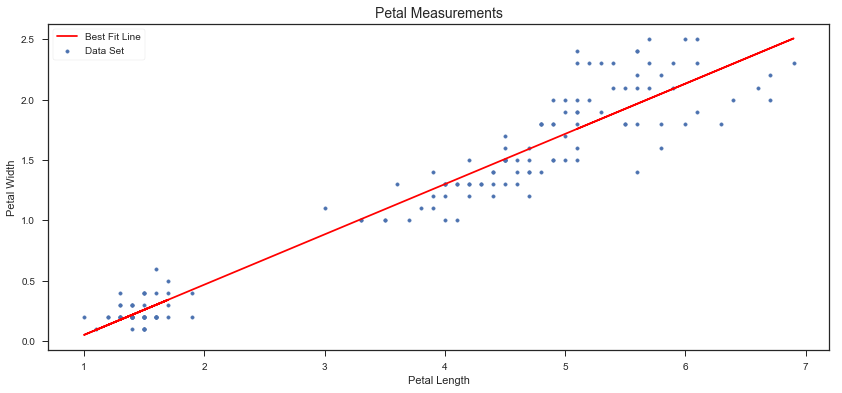

In [5]:
# Conversions adapted from https://stackoverflow.com/a/26440523/7232648

# Adapted from https://github.com/emerging-technologies/emerging-technologies.github.io/blob/master/notebooks/simple-linear-regression.ipynb
w = pLen
d = pWid

w_avg = np.mean(w)
d_avg = np.mean(d)

w_zero = w - w_avg
d_zero = d - d_avg

m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
c = d_avg - m * w_avg

# Graph labels etc
pl.rcParams['figure.figsize'] = (14,6)
pl.title('Petal Measurements', fontsize=14)
pl.xlabel('Petal Length')
pl.ylabel('Petal Width')

pl.scatter(w, d, marker='.', label='Data Set')
pl.plot(w, m * w + c, 'r', label='Best Fit Line')

pl.legend(loc=2, frameon=True)
pl.show()

### 7. Calculate R-sqaured.
The R-squared value estimates *how much of the changes in the $y$ value (petal length)* are due to *the changes in the $x$ value (petal width)* compared to all of the other factors affecting the $y$ value.

In [6]:
# Adapted from https://github.com/emerging-technologies/emerging-technologies.github.io/blob/master/notebooks/simple-linear-regression.ipynb

rsq = 1.0 - (np.sum((d - m * w - c)**2)/np.sum((d - d_avg)**2))
print("R-squared: {0:.6f}".format(rsq))

R-squared: 0.926901


### 8. Fit another line.
Use numpy to fit a straight line to the petal length and width variables for the species *Iris-setosa*. Plot the data points in a scatter plot with the best fit line shown.

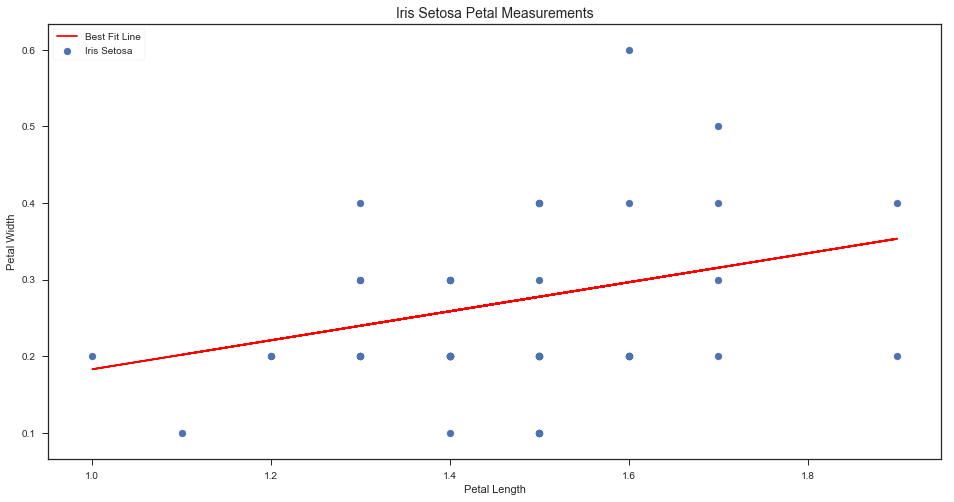

In [7]:
# Adding arrays as columns adapted from https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.column_stack.html
data = np.column_stack((sLen, sWid, pLen, pWid, spec))
#for i in range(5):
    #print(data[i])

# Setosa data -> 0 - 49 in data set. (Definitely better ways of doing this but works for now, will change if there's time)
spLen, spWid= [], []
for index, row in enumerate(data):
    # Petal info contained in cols 2 & 3
    # For each row, append column 2 to spLen array and column 3 to spWid array
    spLen.append(float(row[2]))
    spWid.append(float(row[3]))
    
    if index == 49:
        break

# Calculate best values for m and c
m, c = np.polyfit(spLen, spWid, 1)
y = m * (spLen + c)

# Graph labels etc
pl.rcParams['figure.figsize'] = (16,8)
pl.title('Iris Setosa Petal Measurements', fontsize=14)
pl.xlabel('Petal Length')
pl.ylabel('Petal Width')

pl.scatter(spLen, spWid, label = 'Iris Setosa') # Plot the data points
pl.plot(spLen, y, 'r', label = 'Best Fit Line') # Plot the line

pl.legend(loc=2, frameon=True)
pl.show()

orM = m
orC = c

### 9. Calculate R-squared for the Setosa line.
Calculate the r-squared of the best fitting line for the Setosa data, plotted above.

In [8]:
rsq = 1.0 - (np.sum((d - m * w - c)**2)/np.sum((d - d_avg)**2))
print("R-squared: {0:.6f}".format(rsq))

R-squared: 0.183023


### 10. Use Gradient Descent.

Original 		m:   0.1892624728850327  c:  -0.0330802603036878
Gradient desc 		m:   0.1892624728849683  c:  -0.0330802603035933



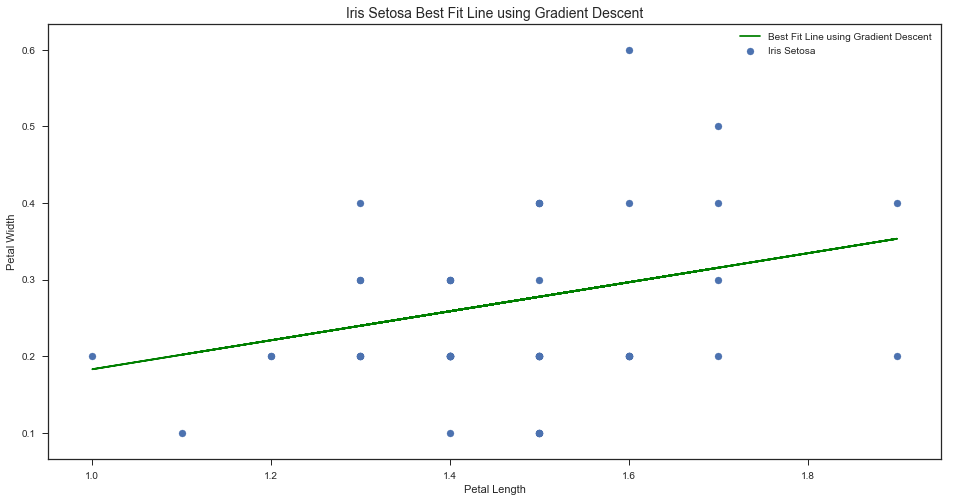

In [9]:
w = np.array(spLen)
d = np.array(spWid)
print("Original \t\tm: %20.16f  c: %20.16f" % (orM, orC))

# Adapted from Gradient Descent worksheet - https://github.com/emerging-technologies/emerging-technologies.github.io/blob/master/notebooks/gradient-descent.ipynb
# Partial derivatives with respect to m and c
def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m, c):
  return -2.0 * np.sum(y - m * x - c)

# Set up variables
eta = 0.0001 # The x in mx + c
gdm, gdc = 1.0, 1.0 # Initial guesses for GD m and c
change = True

while change:
  mnew = gdm - eta * grad_m(w, d, gdm, gdc)
  cnew = gdc - eta * grad_c(w, d, gdm, gdc)
  if gdm == mnew and gdc == cnew:
    # Calculations no longer changing, stop the loop
    change = False
  else:
    gdm, gdc = mnew, cnew

# - End adapted from Gradient Descent worksheet -

print("Gradient desc \t\tm: %20.16f  c: %20.16f" % (gdm, gdc))
print()

# Graph labels etc
pl.rcParams['figure.figsize'] = (16,8)
pl.title('Iris Setosa Best Fit Line using Gradient Descent', fontsize=14)
pl.xlabel('Petal Length')
pl.ylabel('Petal Width')

y = gdm * (spLen + gdc)
pl.scatter(spLen, spWid, label = 'Iris Setosa')
pl.plot(spLen, y, 'g', label='Best Fit Line using Gradient Descent')
pl.legend()
pl.show()

As we can see above, there is a very slight difference in best fit lines generated using polyfit and the gradient descent method. The difference is so small that if you were looking at these lines plotted on two graphs, they would look identical - *see the graph in problem 8, which used polyfit to get the best fit line*.